In [20]:
import numpy as np
import matplotlib.pyplot as plt
import plotutils as pu
import sympy
%matplotlib inline

# noise

Our goal is to produce noise in $n$ dimensions where $1 \le n$. In practical terms we'll not be able to produce noise in infinite dimensions but at least we will consider our algorithms as such we might someday. For this to work the input to our noise function will have to be a vector that describes a point in abstract vector space. We will call this point $x$ from now on. Formally, it is a vector of $n$ components $(A_1, A_2, \ldots, A_n)$ where $A_n \in \mathbb{R}$ and $-1 \le A_n \le 1$.

So we could write $f(\vec{x}) = y$. Note that $x$ here is not some point along the x-axis. It's a vector of $n$ components that specifies some point in abstract n-dimensional vector space. However, when we are dealing with one-dimensional noise this *will* be a point along the x-axis. 

Also, we will add that we really would like $y$ to be in the range of $-1 \le y \le 1$. It's not a *strict* requirement for the noise function $f$ but it would be perfect. Another thing that's important is that our noise function *cannot* be random. If we feed it some point $p$ we should expect the outcome $y$ to be the same *every* time.

What we are looking for is sometimes known as *value noise* and it's basically a seemlingly random value $y$ mapped to some point $p$ in n-dimensional space. 

# value noise in 1-d
We'll start with a function that operates on *integer* $\mathbb{Z}$ coordinates first but we'll quickly look at expanding our range to *real* $\mathbb{R}$ coordinates as well. For now, we'll start with a function $f_0(\vec{p}) = n$ where $\vec{p}$ is a scalar (a vector with one component, so basically just a number) and we'll shoot for $-1 \le n \le 1$.

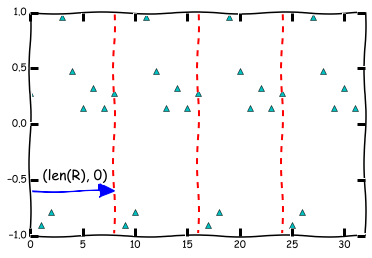

In [94]:
# Our `wave' function just an array of numbers. The length is
# important though - it will determine the period or `wavelength` of
# our noise function.
R = np.random.ranf(8) * 2 - 1

# We'll use a cheap modulo to place `p' in our vector space.
f_0 = lambda p: R[p % len(R)]

# With n steps we'll have n/len(R) periods of noise.
x = np.arange(0, 32, 1)

with plt.xkcd():
    plt.xlim(0, 32)
    plt.plot(x, f_0(x), 'c^')
    plt.plot([8, 8], [-1, 1], 'r--')
    plt.plot([16, 16], [-1, 1], 'r--')
    plt.plot([24, 24], [-1, 1], 'r--')
    arrowprops = {
        'head_length': 1.4, 
        'head_width': 0.12, 
        'length_includes_head': True, 
        'fc': 'b', 
        'ec': 'b'
    }
    plt.arrow(0, -0.6, 8, 0, **arrowprops)
    plt.annotate('(len(R), 0)', (1.15, -0.5))

A few things to notice here. First we setup this pretty important table `R` which contains a random selection of numbers. We use `numpy.random.ranf` which gives us a random number between $0$ and $1$. In order to get it into our desired range of $-1 \le y \le 1$ we multiply it by two and substract one. Multiplying (or scaling it) by two will give us a number in the range of $0 \le y \le 2$ so substracting one from that will get us right in the desired range $0 -1 \le y \le 2 - 1$ which ends up being $-1 \le y \le 1$. 

> #### scaling output
When using `numpy.random.ranf` we get values of $y$ where $0 \le y \le 1$ but we want values where $-1 \le y \le 1$. In order to scale it up we need something that looks like $y = 2x - 1$. We van verify it by checking it. If $x = 0$ we get $y = -1$ and if $x = 2$ we get $y = 1$. Which is exactly what we want. 

> Another way to look at this is as just a *scale* and *translate* operation where we scale something by two and then translate it by one in the oposite direction. In order to get it aligned with the origin again. This also explains why we have `R = np.random.ranf(8) * 2 - 1` in the code above.

We'll need to formalize this a bit more. For one thing, we know that `R` is just some values. In the example above we used eight values so we got a *period* (or *wavelength*) of 8. This is `len(R)`. If we increase the size of `R` we get a bigger period of noise. Of course we're just using integers as input so in our plot we'll have to do with points and not lines.

Let's summarize and consider that $R_n$ is a vector with $n$ components $(A_1, A_2, \ldots, A_n)$ where: 
* $0 \lt n$ and $n \in \mathbb{N}$
* $A_1, A_2, \ldots, A_n \in \mathbb{R}$ 
* $-1 \le A_n \le 1$. 

Now we have: $f_0(p) = R_{p \pmod q} = y$ where `q = len(R)`. 

And this (or is intended to be) equivalent to `f_0 = lambda p: R[p % len(R)]` in the code above. Basically what we have is a table $n$ of $q$ values and when given some $x$ it'll give you some value $n_{x \pmod q}$. We use the $mod$ operation to make sure we are always in a valid range of $q$ with respect to the amount of components in $R$.

# finalizing noise
One thing we've struggled a bit is with the amount of compoents in $R$. Remember, $R$ is nothing more than just a bag of random numbers. Let's now try to formalize all the definitions we have so far. We'll start with $R$. Which is actually pretty hard.